In [1]:
# Classification and Regression Trees; Tree Ensembles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# tree visualization dependencies
import graphviz
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

# ensemble dependency
from sklearn.ensemble import RandomForestClassifier as RF

In [2]:
# a. Pick any of the data sets you have previously performed
# regression on and fit a regression tree. Plot and compare your
# results

wine_data = pd.read_csv("../wine-labeled.csv")

wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [3]:
# split into x and y data
input_data = np.array(wine_data.drop(columns=['quality','type']))
target_data = np.array(wine_data['quality'])
regression_input_data = np.array(wine_data.drop(columns=['quality','type','alcohol']))
regression_target_data = np.array(wine_data['alcohol'])

features=list(wine_data.columns)[:-2]
classes = np.unique(target_data)

In [4]:
# run the tree
x_train, x_test, y_train, y_test = train_test_split(regression_input_data, regression_target_data)

model = DTR(max_depth=5)
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.6790777668381203

In [5]:
# b. classify with a tree

x_train, x_test, y_train, y_test = train_test_split(input_data, target_data)

model = DTC(max_depth=5)
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

accuracy_score(y_test, y_predicted)

0.5464615384615384

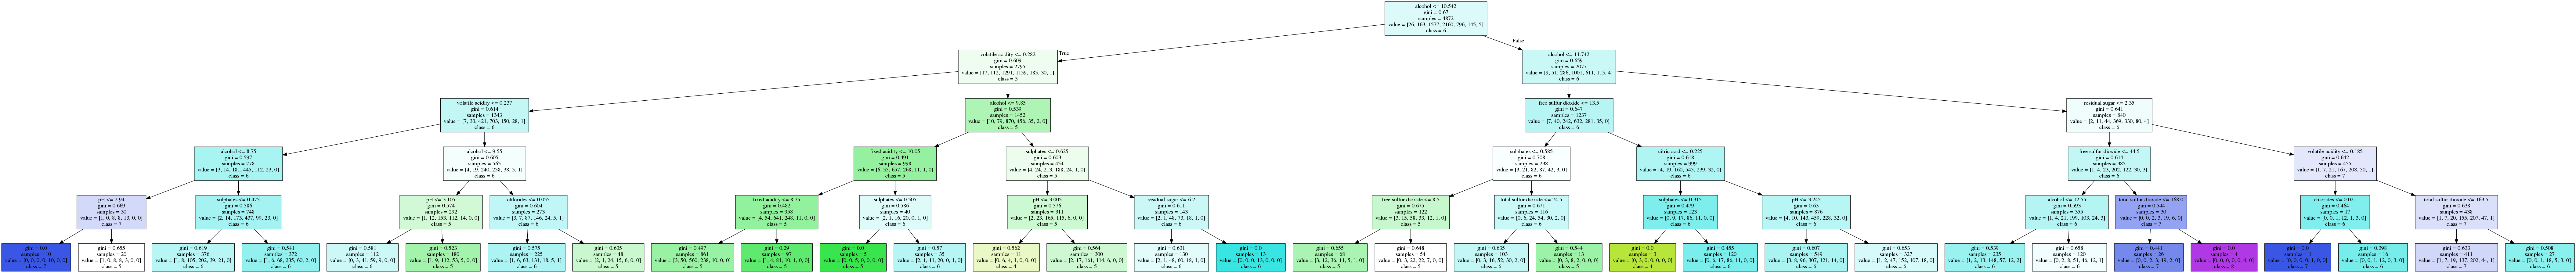

In [6]:
# visualize graph
dot = export_graphviz(
        model, rotate=False,
        filled=True,
        feature_names=features,
        class_names=[str(u) for u in classes]
        )

g = pydotplus.graph_from_dot_data(dot)
Image(g.create_png())

In [7]:
x_tr, x_ts, y_tr, y_ts = train_test_split(input_data, target_data)

model = RF(n_estimators=100)
model.fit(x_tr, y_tr)

y_pre = model.predict(x_ts)

accuracy_score(y_ts, y_pre)

0.6824615384615385